In [1]:
import pandas as pd
import seaborn as sns
import numpy as nm
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('obesity_data.csv')

In [3]:
data

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [5]:
data.corr()

,Age,Height,Weight,BMI,PhysicalActivityLevel
Age,1.000000,0.019647,-0.061400,-0.059971,-0.022308
Height,0.019647,1.000000,0.016033,-0.477091,0.030380
Weight,-0.061400,0.016033,1.000000,0.861438,0.063406
BMI,-0.059971,-0.477091,0.861438,1.000000,0.038020
PhysicalActivityLevel,-0.022308,0.030380,0.063406,0.038020,1.000000


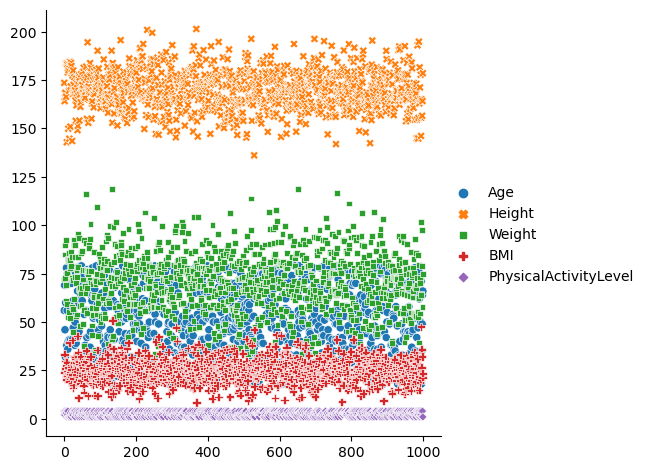

In [6]:
sns.relplot(data)

In [7]:
data.drop('Gender', axis=1, inplace=True)

<Axes: xlabel='Age', ylabel='BMI'>

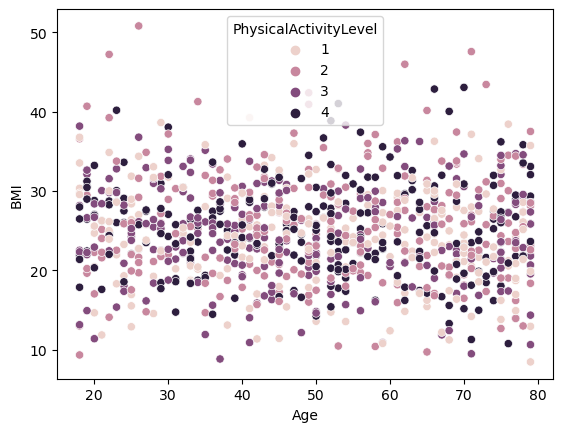

In [8]:
sns.scatterplot(data=data,x='Age',hue='PhysicalActivityLevel', y='BMI')

In [9]:
data

,Age,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,173.575262,71.982051,23.891783,4,Normal weight
1,69,164.127306,89.959256,33.395209,2,Obese
2,46,168.072202,72.930629,25.817737,4,Overweight
3,32,168.459633,84.886912,29.912247,3,Overweight
4,60,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...
995,18,155.588674,64.103182,26.480345,4,Overweight
996,35,165.076490,97.639771,35.830783,1,Obese
997,49,156.570956,78.804284,32.146036,1,Obese
998,64,164.192222,57.978115,21.505965,4,Normal weight


In [10]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
X = data.drop('ObesityCategory', axis=1)

In [12]:
y= data['ObesityCategory']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
encoder = OrdinalEncoder()

In [15]:
X = encoder.fit_transform(X)

In [16]:
y_encoder = LabelEncoder()

In [17]:
y = y_encoder.fit_transform(y)

In [18]:
log = LogisticRegression()

In [19]:
log.fit(X_train,y_train)

/home/lenovo/yes/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
model = log.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test,model)

In [22]:
print('Accuracy score is: ',accuracy)

Accuracy score is:  0.9666666666666667


In [23]:
pred=pd.DataFrame({'Predicted_values':model})
pred.shape

(330, 1)

In [24]:
y_test_data = pd.DataFrame(y_test,columns=['ObesityCategory'])
y_test_data.shape
                           

(330, 1)

In [25]:
X_test_data = pd.DataFrame(X_test)
X_test_data.shape

(330, 5)

In [26]:
new_data =pd.concat([X_test_data,y_test_data,pred],axis=1)
new_data.shape

(549, 7)

In [27]:
new_data.dropna(inplace=True)

In [28]:
new_data

,Age,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory,Predicted_values
2,46.0,168.072202,72.930629,25.817737,4.0,Overweight,Overweight
3,32.0,168.459633,84.886912,29.912247,3.0,Overweight,Normal weight
5,25.0,166.405627,61.145868,22.081628,4.0,Normal weight,Normal weight
7,38.0,142.875095,59.359746,29.078966,1.0,Overweight,Normal weight
9,75.0,182.974061,81.533460,24.353244,2.0,Normal weight,Underweight
...,...,...,...,...,...,...,...
319,50.0,171.205899,64.037053,21.847104,4.0,Normal weight,Normal weight
321,77.0,165.727144,78.494213,28.579219,3.0,Overweight,Obese
323,23.0,174.838923,79.535943,26.018796,4.0,Overweight,Obese
327,37.0,171.965821,96.591868,32.663016,2.0,Obese,Underweight


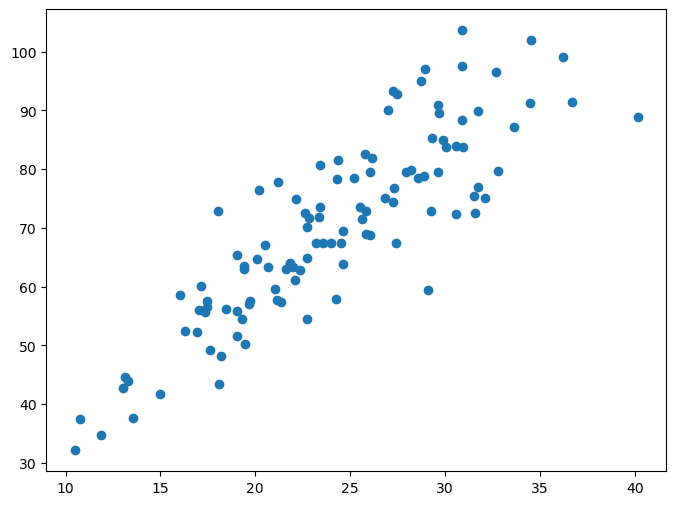

In [31]:
# The model performed very